### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<Axes: title={'center': 'Null Value Count'}>

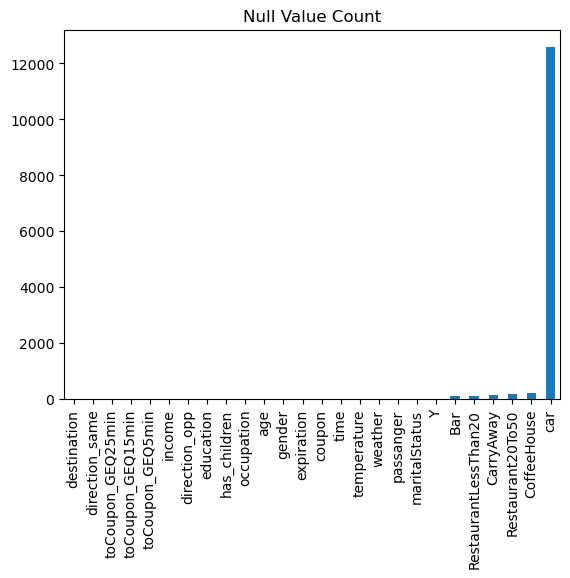

In [4]:
data.isna().sum().sort_values().plot(kind='bar', title='Null Value Count')

The column 'car' seems to have null values in almost all of its users listed.
What does the column 'car' mean though? 
Let's see what does the non-null values look like.

In [5]:
data[~data['car'].isna()]['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

According to the data's context, I would presume that this represents the vehicle that the user is currently using when he/she received the coupon as he/she is heading towards his/her destination.

The bar-chart also shows that the columns 'Bar', 'RestaurantLessThan20', 'CarryAway', Restaurant20To50', and 'CoffeeHouse' have very few null-values.

3. (1) Decide what to do about your missing data -- drop, replace, other...

Since the column 'car' mostly has null-values, I would say that this column is unreliable. Thus, as part of the data cleaning, I would drop this column.
As for the other columns that also have null-values, since they have very little null-values, I would keep these columns and just get rid of users that have null-values on any of these columns since cleaning away a few users wouldn't impact the data that much.

In [6]:
data_clean = data.drop(columns=['car'])
data_clean.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

<Axes: title={'center': 'Null Value Count After Data Cleaning'}>

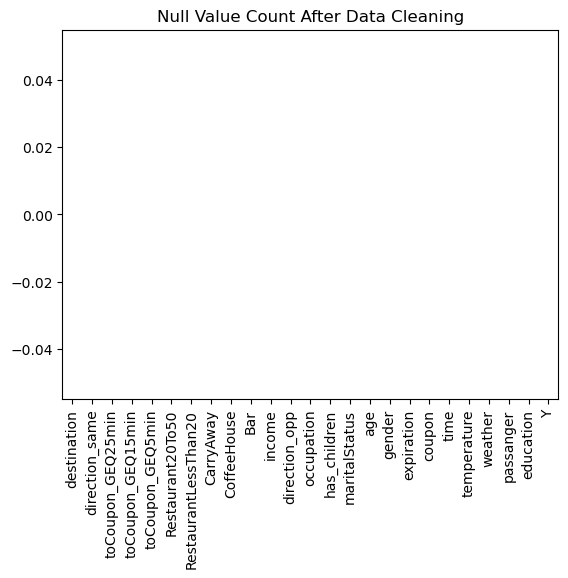

In [7]:
data_clean = data_clean.dropna()
data_clean.isna().sum().sort_values().plot(kind='bar', title='Null Value Count After Data Cleaning')

In [8]:
data.shape[0] - data_clean.shape[0]

605

In [9]:
data_clean.shape[0]

12079

After cleaning, only 605 users were removed, and there are still over 12k users left. Thus, I believe the cleaned data is still sufficiently reliable and accurate.

3. (2) Additional Corrections/Modifications

In [10]:
data_clean.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

I've noticed that the column "passanger" is spelled incorrectly. Thus, I will rename it correctly.

In [11]:
data_clean = data_clean.rename(columns={'passanger':'passenger'})
data_clean.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

I will check on the datatypes in the dataset to see if there are any types I should change for the sake of better data splitting or comparing.

In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

'time' column catches my attention because its type is an object but may be a good idea to change it into an integer type.

In [13]:
data_clean['time'].unique()

array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

For the sake of easier data splitting/comparing, I will change the column 'time' into an integer 24-Hour Clock Time. I will also rename the 'time' column into 'time_hour_24' for better clarification.

In [14]:
def clock(time):
    timeInt = None
    if (time.endswith('AM')) :
        timeInt = time.replace('AM','')
        timeInt = int(timeInt)
        if (timeInt == 12) :
            timeInt = 0
    elif (time.endswith('PM')) :
        timeInt = time.replace('PM','')
        timeInt = int(timeInt) + 12
    return timeInt

In [15]:
data_clean[['time']].head(10)

,time
22,2PM
23,10AM
24,10AM
25,10AM
26,2PM
27,2PM
28,2PM
29,2PM
30,6PM
31,6PM


In [16]:
data_clean['time'] = data_clean['time'].map(clock)

In [17]:
data_clean = data_clean.rename(columns={'time':'time_hour_24'})

In [18]:
data_clean[['time_hour_24']].head(10)

,time_hour_24
22,14
23,10
24,10
25,10
26,14
27,14
28,14
29,14
30,18
31,18


'age' column also catches my attention for the same reason.

In [19]:
data_clean['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

I will change the 'age' column to an integer column as well. For the 'below21', I will just change it into integer 20 and for the '50plus', I will change it into integer 50. I will keep in mind that 20 means users of age 20 or lower and 50 means users of age 50 or higher.

In [20]:
def ageInt(age):
    if ('below' in age):
        age = age.replace('below','')
        age = int(age) - 1
    elif ('plus' in age):
        age = age.replace('plus','')
    return int(age)

In [21]:
data_clean['age'] = data_clean['age'].map(ageInt)

In [22]:
data_clean['age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 12079 entries, 22 to 12683
Series name: age
Non-Null Count  Dtype
--------------  -----
12079 non-null  int64
dtypes: int64(1)
memory usage: 188.7 KB


4. What proportion of the total observations chose to accept the coupon? 



<Axes: title={'center': '(0 - Reject Coupon) (1 - Accept Coupon)'}, ylabel='Y'>

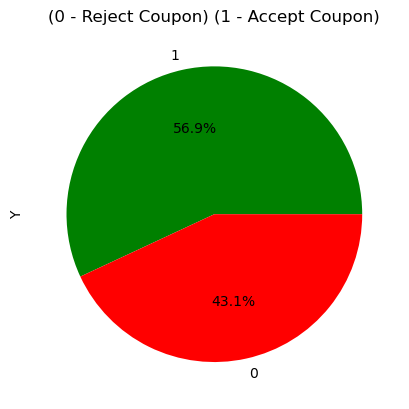

In [23]:
data_clean['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], title='(0 - Reject Coupon) (1 - Accept Coupon)')

According to the pie chart of the cleaned data, 56.9% chose to accept the coupon which is a little over a half of the users listed in the clean data.

5. Use a bar plot to visualize the `coupon` column.

[Text(0.5, 1.0, 'Coupon Frequency')]

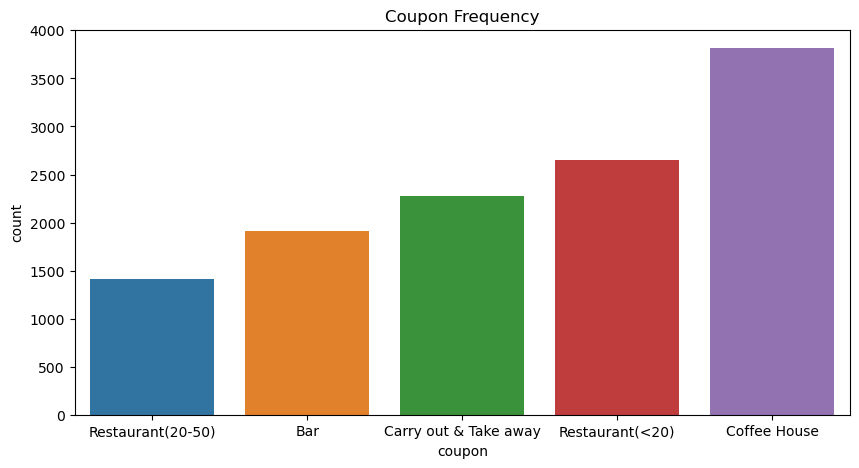

In [24]:
plt.figure(figsize = (10, 5))
sns.countplot(data_clean, x='coupon', 
              order=data_clean['coupon'].value_counts(ascending=True).index).set(title='Coupon Frequency')

Expensive Restaurant coupons ($20-50) are the least frequent coupons in the dataset,
and the Coffee House coupons are the most frequent coupons in the dataset.

6. Use a histogram to visualize the temperature column.

[Text(0.5, 1.0, 'Temperature Frequency')]

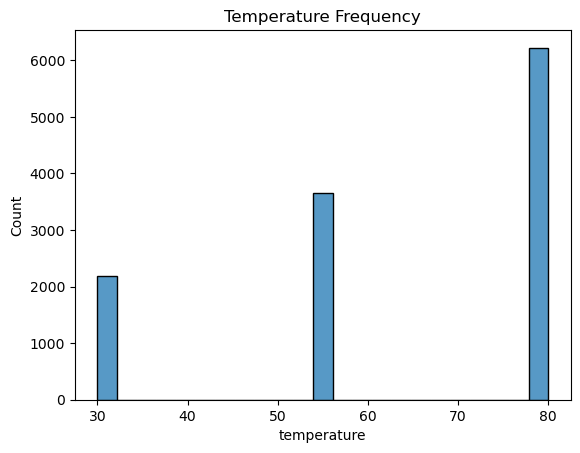

In [25]:
sns.histplot(data_clean['temperature']).set(title='Temperature Frequency')

Apparently, temperature 30F is least frequent, 55F is in between, and 80F is the most frequent.
Seems like there is a positive correlation between temperature and its frequency.

### Investigating the Carry out & Take away (To-Go) Coupons

As usual, let's find the proportion of users who will accept the carry out & take away coupons out of all users who have received it.

In [26]:
carry_take = data_clean.query('coupon == "Carry out & Take away"')

In [27]:
carry_take['coupon'].unique()

array(['Carry out & Take away'], dtype=object)

<Axes: title={'center': 'To-Go Coupon Acceptance Rate'}, ylabel='Y'>

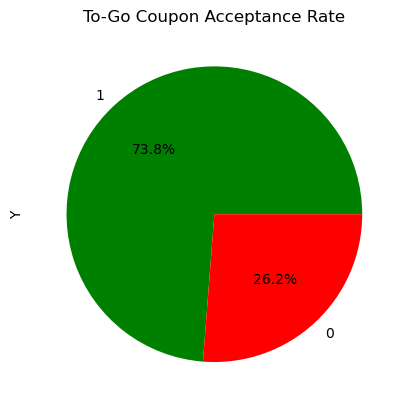

In [28]:
carry_take['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], title='To-Go Coupon Acceptance Rate')

Most users who received this coupon accepted it but let's see if we can find users with specific backgrounds that will more likely accept it.

Since this coupon has to do with picking up food, I'd say it would be most convenient if users can pick it up on the way to their destination. 

Thus, let's compare the acceptance rate of users who would or wouldn't have to backtrack if they were to accept the coupon.

In [29]:
no_backtrack = carry_take.query('direction_same == 1')
backtrack = carry_take.query('direction_opp == 1')

<Axes: title={'center': 'To-Go Coupon Acceptance Rate (Same Direction)'}, ylabel='Y'>

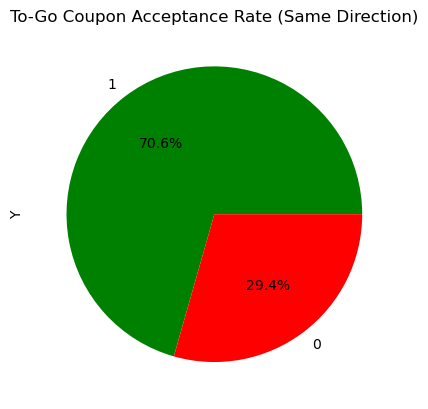

In [30]:
no_backtrack['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', 
                                    colors = ['g', 'r'], title='To-Go Coupon Acceptance Rate (Same Direction)')

<Axes: title={'center': 'To-Go Coupon Acceptance Rate (Opposite Direction)'}, ylabel='Y'>

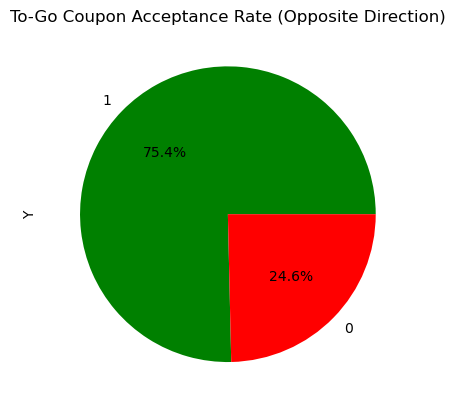

In [31]:
backtrack['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', 
                                    colors = ['g', 'r'], title='To-Go Coupon Acceptance Rate (Opposite Direction)')

This is not what I expect. It would seem that whether they need to backtrack or not wouldn't matter to the users if they were to accept the coupon.

I don't think users would likely accept this coupon if they need to drive the opposite direction of their destination as that sounds unintuitive. Perhaps many users who needed to go to the opposite direction happens to be already close to it so it may not have matter.

I will investigate further on the three columns that start with 'toCoupon_GEQ' as I believe that they are responsible for telling us how long it would take for the users to get to the location for them to use their coupon.

In [32]:
to_coupon = [label for label in carry_take.columns if label.startswith('toCoupon_GEQ')]
to_coupon

['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

Presuming that only one of the three columns will have a '1' representing 'True' while the others are '0' representing 'False', I wanted to take advantage of that by creating a new column that will add all three columns together, each multiplied by its specified minutes. 

That way, I would get a column of the minutes it would take for the users to arrive at a location to use their coupon.

In [33]:
minToCoupon = carry_take[to_coupon[0]] * 5 + carry_take[to_coupon[1]] * 15 + carry_take[to_coupon[2]] * 25
minToCoupon

25       20
33       20
41        5
47       20
55       20
         ..
12665     5
12672    20
12673     5
12679     5
12680     5
Length: 2280, dtype: int64

I found it strange that some elements are 20 minutes since there are only 5, 15, and 25 minutes and thus, I decided to investigate the three columns.

In [34]:
carry_take[to_coupon].head(5)

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min
25,1,1,0
33,1,1,0
41,1,0,0
47,1,1,0
55,1,1,0


I did not expect that more than one of these columns could be marked as '1' but perhaps some users have more than one location to get their coupons. Thus, creating a column 'minToCoupon' would be unreliable.

I might also wrongly interpret the three columns and that instead of representing true/false, they might represent a number of locations to get there at the same time. Thus, to confirm that, I look for all unique values in each of the three columns.

In [35]:
carry_take[to_coupon[0]].unique()

array([1], dtype=int64)

In [36]:
carry_take[to_coupon[1]].unique()

array([1, 0], dtype=int64)

In [37]:
carry_take[to_coupon[2]].unique()

array([0, 1], dtype=int64)

Looks like I correctly interpret that the three columns are indeed about True/False. I also gain an additional information.

If you pay attention to 'carry_take[to_coupon[0]].unique()', you will notice that it implies that column 'toCoupon_GEQ5min' is always '1' in dataframe carry_take, i.e. all users who have received the carry out & take away coupon. 

This means that all users who receive this coupon are only 5 minutes away from a location to use their coupon. That may explain why users wouldn't care less if they backtrack since the location is close from the start.

In fact, since all users know that they can use the coupon after only traveling for 5 minutes, that would boost their likelihood to accept the coupon which can explain why we have about 3 quarters of them accepting the coupon.

I will now focus on the column 'destination' and look through all the unique elements.

In [38]:
carry_take['destination'].unique()

array(['No Urgent Place', 'Work', 'Home'], dtype=object)

I suspect that if the users need to go to 'Work', then they would mostly have no time to go to a restaurant. They would probably need a carry out and take away food for a meal break at their workplace. 

To confirm that, I will create a heatmap of columns 'Y' vs. 'destination' expecting that area Y=1 and destination=Work would have a high density.

<Axes: xlabel='destination', ylabel='Y'>

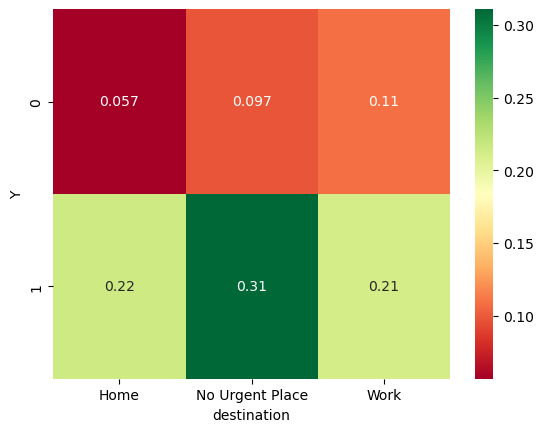

In [39]:
sns.heatmap(pd.crosstab(carry_take.Y,carry_take.destination,normalize=True),annot=True,cmap="RdYlGn")

I did not expect this either. On top of that, to think that users going to 'Work' would have the highest likelihood to reject the coupon according to the heatmap showing the highest density at Y=0, destination=Work then all other Y=0 areas.

The heatmap seems to imply that users who have 'no urgent place destination' would have the highest likelihood to accept the coupon.

Let's might as well create a heatmap for 'Y' vs. 'CarryAway' to see if users who monthly uses more CarryAway services would more likely to accept the CarryAway coupon as I intuitively think that would be the case.

<Axes: xlabel='CarryAway', ylabel='Y'>

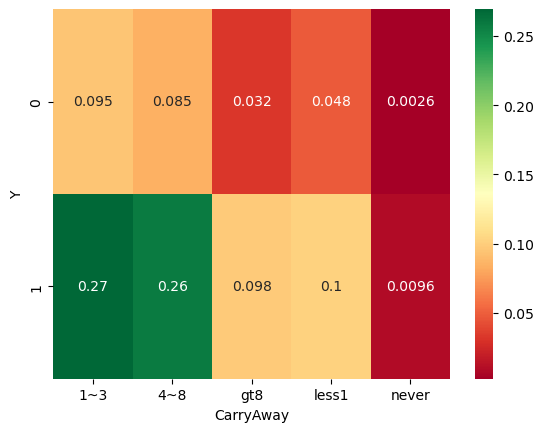

In [40]:
sns.heatmap(pd.crosstab(carry_take.Y,carry_take.CarryAway,normalize=True),annot=True,cmap="RdYlGn")

Yeah, mostly from what I expect, the users who monthly do CarryAway more than once will likely to accept the coupon made specifically for that.

**Final Conclusion**

Based on my investigation, I can hypothesize that maintaining within 5 min. distance from the users to use the CarryAway coupon will encourage the users to accept them. In addition, if the users are not going anywhere urgent and are monthly doing CarryAway more than once, primarily in range of 1-8 times, then they would more likely accept them.

**Recommended Action**

As mentioned before, offer CarryAway coupons to users who can use this coupon in a location within a 5 min. driving range. For those within a 5 min. driving distance, I suggest to specifically target ones who monthly visit a Coffee House more than once but ideally within 1-8 times. Furthermore, the less urgent that the users feel to go anywhere, the better.